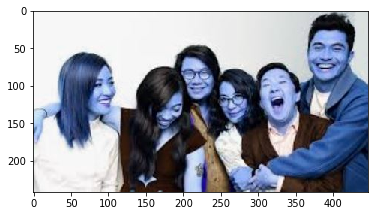

In [3]:
from matplotlib import pyplot as plt
import numpy as np
import cv2

%matplotlib inline 

image = cv2.imread('friends..JPG')
img2 = image[:,:,::-1]
plt.imshow(image)

In [14]:
proto = 'deploy.prototxt'
model = 'res10_300x300_ssd_iter_140000.caffemodel'

net = cv2.dnn.readNetFromCaffe(proto, model)

blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0,(300, 300), (104.0, 177.0, 123.0))
 
net.setInput(blob)
detections = net.forward()


det: (1, 1, 56, 7)


face detected, probability:  100.00%
face detected, probability:  99.13%
face detected, probability:  98.74%
face detected, probability:  91.44%
face detected, probability:  55.55%


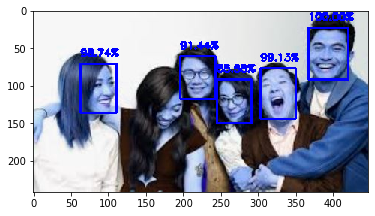

In [18]:
# loop over the detections
(h, w) = image.shape[:2]
for i in range(0, detections.shape[2]):
    # extract the confidence (i.e., probability) associated with the
    # prediction
    confidence = detections[0, 0, i, 2]
 
    # filter out weak detections by ensuring the `confidence` is
    # greater than the minimum confidence
    if confidence > 0.5:
        # compute the (x, y)-coordinates of the bounding box for the
        # object
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")
 
        # draw the bounding box of the face along with the associated
        # probability
        text = "{:.2f}%".format(confidence * 100)
        print ("face detected, probability: ",text)
        y = startY - 10 if startY - 10 > 10 else startY + 10
        cv2.rectangle(image, (startX, startY), (endX, endY),
            (0, 0, 255), 2)
        cv2.putText(image, text, (startX, y),
            cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)
 
# show the output image
#cv2.imshow("Output", image)
plt.imshow(image)
#cv2.waitKey(0)